In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import warnings
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
warnings.filterwarnings('ignore')

# Data loading and overview

In [5]:
train_df = pd.read_csv("dev.csv")
test_df = pd.read_csv("compete.csv")

In [6]:
from sklearn import preprocessing

cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    if col in train_df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(list(train_df[col].astype(str).values) + list(test_df[col].astype(str).values))
        train_df[col] = le.transform(list(train_df[col].astype(str).values))
        test_df[col] = le.transform(list(test_df[col].astype(str).values))   

In [7]:
minColumns = ['duration', 'src_bytes', 'dst_bytes', 'dst_host_srv_count', 'count', 'srv_count']

In [8]:
train_df[minColumns] = (train_df[minColumns] - train_df[minColumns].min(axis=0)) / (train_df[minColumns].max(axis=0) - train_df[minColumns].min(axis=0))
train_df[minColumns] = train_df[minColumns] * ((train_df[minColumns].max(axis=0) - train_df[minColumns].min(axis=0)) + train_df[minColumns].min(axis=0))

In [9]:
y = train_df['class']
X = train_df.drop(['class'], axis=1)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=99)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=99)

In [11]:
clusters = kmeans.predict(X)

In [12]:
cluster_df = pd.DataFrame()
cluster_df['cluster'] = clusters

cluster_df['class'] = y

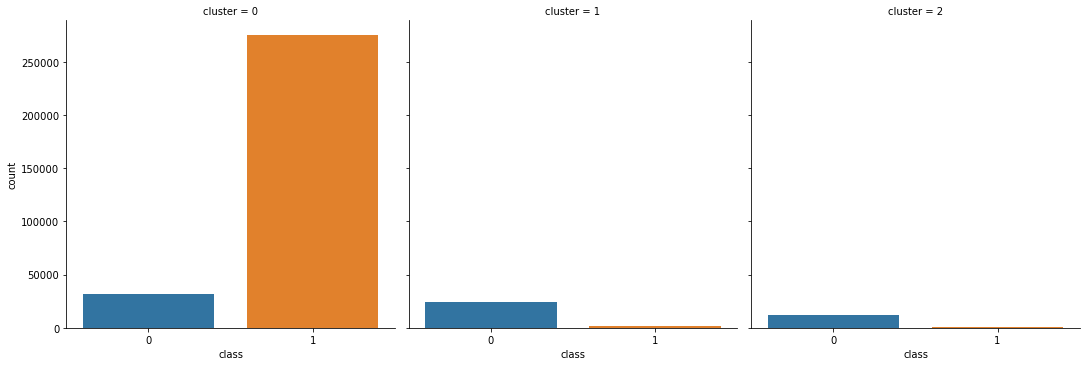

In [13]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

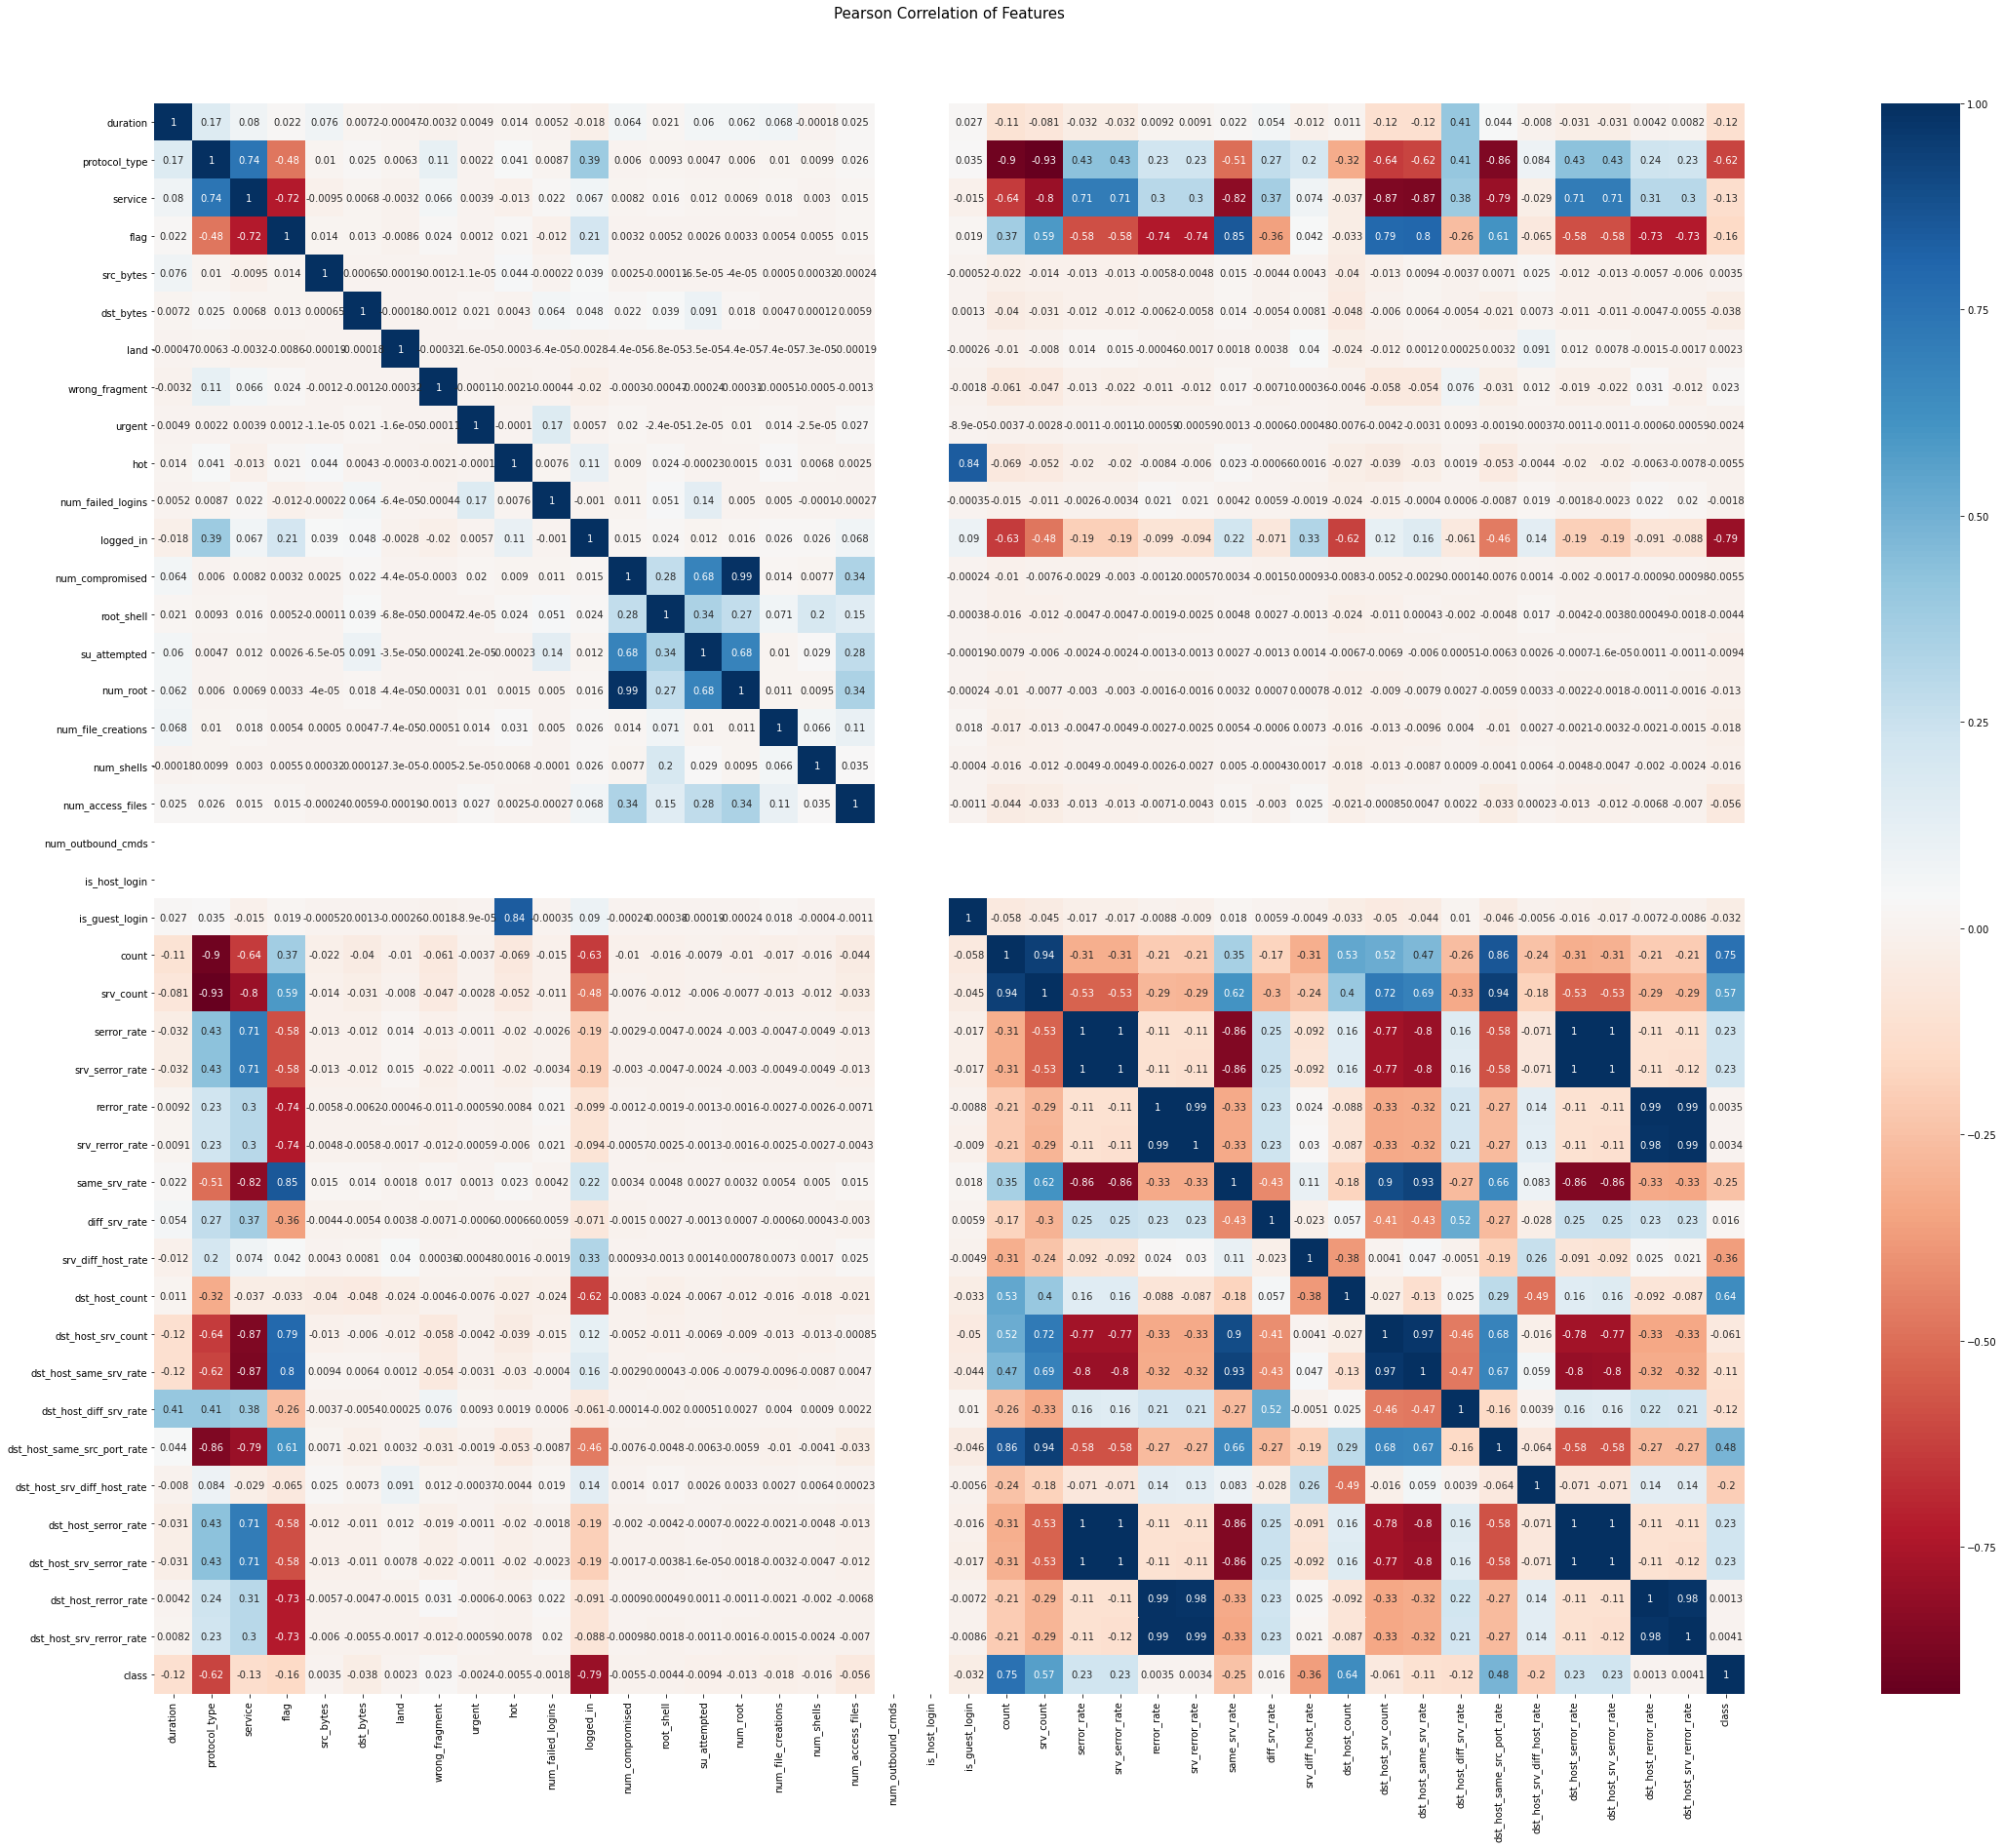

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(), square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
labels = train_df['class'].values

In [16]:
import pandas as pd
from sklearn import preprocessing

x = train_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [17]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
with_pca = pca.fit_transform(df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.56011872 0.24155375]
[694.99724337 456.40451387]


In [18]:
with_pca

array([[ 0.76288306,  1.24355223],
       [ 0.38254506,  1.22483013],
       [ 0.51947125,  1.4957367 ],
       ...,
       [-0.90970397, -0.31982862],
       [ 1.27300773,  0.22597379],
       [-0.90970397, -0.31982862]])

In [19]:
df_final = pd.DataFrame(with_pca)

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(df_final)
y_kmeans = kmeans.predict(df_final)

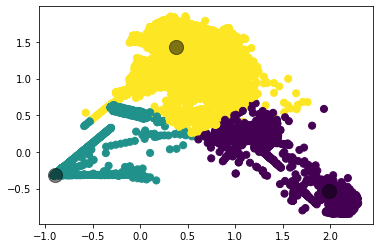

In [40]:
plt.scatter(df_final[0], df_final[1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [28]:
df_final_labels = df_final
df_final_labels['labels'] = labels

In [29]:
df_final_labels.columns

Index([0, 1, 'labels'], dtype='object')

In [30]:
df_final_labels = df_final_labels.rename(columns={0: "a", 1: "c"})

<AxesSubplot:xlabel='a', ylabel='c'>

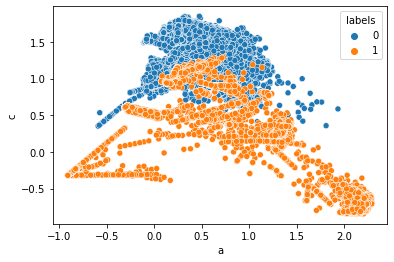

In [31]:
sns.scatterplot('a', 'c', data=df_final_labels, hue='labels')